In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

from helpers import *

warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.filterwarnings("ignore", category=UserWarning)

pd.set_option('display.float_format', lambda x: '%.3f' % x)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.width', 500)

In [2]:
train = pd.read_parquet("/Users/furkan/development/ML_DS/İş Bankası/train_final.parquet")
test = pd.read_parquet("/Users/furkan/development/ML_DS/İş Bankası/test_final.parquet")
df = train.copy()
df.head()

,id,month,n_seconds_1,n_seconds_2,n_seconds_3,carrier,devicebrand,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,feature_11,feature_12,feature_13,feature_14,feature_15,feature_16,feature_17,feature_18,feature_19,feature_20,feature_21,feature_22,feature_23,feature_24,feature_25,feature_26,feature_27,feature_28,feature_29,feature_30,feature_31,feature_32,feature_33,feature_34,feature_35,feature_36,feature_37,feature_38,feature_39,feature_40,feature_41,feature_42,feature_43,feature_44,feature_45,feature_46,feature_47,feature_48,feature_49,target
0,5beefd4d2bf4a4767e0df8108,10,5245.571,981.182,205.948,VODAFONE TR,Apple,-1.198,1.113,-1.123,-0.264,2.161,2.651,0.810,1.516,2.351,-4.608,0.678,-0.555,3.502,-0.765,1.543,-1.458,-1.017,-1.820,0.726,-1.444,1.087,2.102,-0.249,-0.583,-1.330,1.407,1.054,-1.532,1.667,0.251,-0.091,2.676,-0.621,0.163,1.720,-6.139,-0.303,2.784,-3.135,-3.794,0.930,-2.613,-2.033,2.646,-1.023,1.659,-1.559,-2.161,30,58,"menu2, menu4, menu5"
1,867285b116c063d5a8482f5be,10,5184.876,557.650,487.587,TURKCELL,samsung,-2.336,2.568,-0.495,0.949,3.568,3.358,0.434,0.886,1.452,-3.184,1.024,1.166,2.916,-1.281,3.019,-3.163,-1.120,-2.798,0.287,-2.029,0.260,0.962,-0.534,-1.311,-0.144,-1.562,1.931,-0.942,-0.000,-1.372,1.225,2.795,-0.961,0.114,1.048,-5.697,0.902,-0.073,-2.366,-0.600,0.815,-0.984,-1.454,-0.022,-0.196,2.776,-0.319,-4.291,21,45,"menu7, menu8, menu4"
2,c82a7cbd2e00d9b66c06bcadc,10,3835.618,3275.128,43.806,TURK TELEKOM,Redmi,-2.561,2.062,-0.185,1.062,4.198,1.551,-0.596,-0.619,2.017,-4.631,-0.663,-0.838,1.821,-2.171,3.695,-0.922,-2.873,-2.042,0.533,-0.128,0.450,2.716,-0.178,0.052,-0.518,-0.043,1.157,-0.527,-0.088,-0.497,1.203,2.742,-0.623,1.757,2.059,-5.359,0.929,1.133,-3.100,-1.253,1.057,-1.669,-3.599,1.674,0.632,1.293,-2.231,-2.384,19,61,"menu2, menu8, menu4"
3,f2d2b25073ccc298eced86897,10,3532.544,154.509,64.724,TURKCELL,samsung,-2.530,3.358,-0.851,1.644,2.849,3.887,1.855,0.988,2.066,-5.804,1.931,0.151,3.145,-2.673,0.378,-2.657,-0.378,-3.276,0.003,-0.674,-0.227,1.817,0.068,-0.787,-1.708,-2.000,1.770,0.049,0.230,-0.304,1.659,1.692,-1.105,1.242,2.043,-3.854,0.649,0.944,-3.027,-1.824,0.204,-1.861,-1.220,1.863,0.213,1.030,-1.142,-4.466,2,41,"menu6, menu2, menu1"
4,7818c92a58af0f2cb7c361738,10,3344.192,787.896,715.115,VODAFONE TR,samsung,-2.922,2.096,0.061,-1.488,3.225,2.092,-0.993,0.686,2.090,-2.974,-0.797,-1.459,2.398,-1.308,3.381,-2.664,-2.219,-1.714,1.288,-2.250,2.345,0.403,-0.077,0.289,1.847,1.424,1.888,-1.022,1.021,-0.843,-0.859,2.565,0.412,0.068,0.391,-5.996,2.675,0.203,-3.272,-1.418,2.188,-0.143,-1.876,1.024,-0.186,-0.062,-1.462,-2.371,23,85,"menu6, menu2, menu8"


## EDA

In [3]:
check_df(df)

##################### Shape #####################
(94049, 58)
##################### Types #####################
id              object
month            int64
n_seconds_1    float64
n_seconds_2    float64
n_seconds_3    float64
carrier         object
devicebrand     object
feature_0      float64
feature_1      float64
feature_2      float64
feature_3      float64
feature_4      float64
feature_5      float64
feature_6      float64
feature_7      float64
feature_8      float64
feature_9      float64
feature_10     float64
feature_11     float64
feature_12     float64
feature_13     float64
feature_14     float64
feature_15     float64
feature_16     float64
feature_17     float64
feature_18     float64
feature_19     float64
feature_20     float64
feature_21     float64
feature_22     float64
feature_23     float64
feature_24     float64
feature_25     float64
feature_26     float64
feature_27     float64
feature_28     float64
feature_29     float64
feature_30     float64
feature_31    

In [4]:
cat_cols, num_cols, cat_but_car = grab_col_names(df)

Observations: 94049
Variables: 58
cat_cols: 1
num_cols: 53
cat_but_car: 4
num_but_cat: 1


       month  Ratio
month              
12     44433 47.245
11     34485 36.667
10     15131 16.088
##########################################


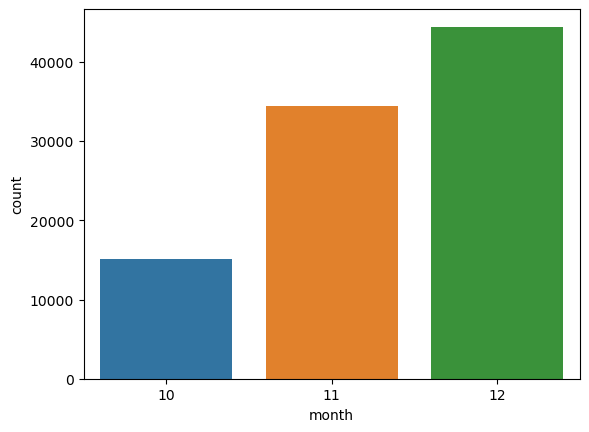

In [5]:
for col in cat_cols:
    cat_summary(df, col, plot=True)

In [6]:
for col in num_cols:
    num_summary(df, col)

count   94049.000
mean      432.782
std       429.834
min        41.850
5%         93.407
10%       117.600
20%       160.290
30%       203.201
40%       250.600
50%       306.947
60%       379.998
70%       479.845
80%       599.749
90%       853.891
95%      1165.145
99%      2150.449
max     13567.046
Name: n_seconds_1, dtype: float64
count   94049.000
mean      197.904
std       169.475
min        40.231
5%         56.843
10%        66.345
20%        83.230
30%       101.002
40%       120.972
50%       144.874
60%       174.551
70%       214.698
80%       274.679
90%       393.364
95%       525.944
99%       845.388
max      3275.128
Name: n_seconds_2, dtype: float64
count   94049.000
mean      102.382
std        80.534
min        40.001
5%         42.399
10%        44.932
20%        50.559
30%        57.267
40%        65.205
50%        75.415
60%        88.440
70%       106.949
80%       134.906
90%       189.913
95%       252.950
99%       440.111
max      1476.077
Name: n_second

In [7]:
df["carrier"].value_counts()

carrier
TURKCELL                             39043
VODAFONE TR                          25583
TURK TELEKOM                         22091
BIMCELL                               1108
Unknown                                684
KKTCELL                                659
VODAFONE                               560
HAYATEVESIGAR                          559
TEKNOSACELL                            498
PTTCELL                                423
LIFECELL TR                            177
FENERCELL                              136
VODAFONE.DE                            102
TR TURKCELL                             97
O2-DE                                   90
AVEA                                    84
GSMOBILE                                81
CARRIER                                 77
T-MOBILE                                62
VODAFONE UK                             59
ELUX                                    56
CUMHURIYET                              49
TEKNOSA                                 48
TEL

In [8]:
df["devicebrand"].value_counts()

devicebrand
Apple            33238
samsung          31971
Redmi             7709
HUAWEI            6595
xiaomi            5300
OPPO              3247
POCO               989
GM                 770
realme             562
lge                442
TECNO              296
Casper             278
HONOR              264
Vestel             261
vivo               239
reeder             220
Sony               216
OnePlus            185
Lenovo             181
gm                 178
asus               156
TCL                151
OMIX               114
Infinix             65
Nokia               57
google              53
Meizu               49
motorola            31
htc                 21
Alcatel             21
ZTE                 18
Realme              16
TURKCELL            14
OUKITEL             14
HIKING              13
CASPER              13
Reeder              12
generalmobile       11
HTC                  7
meizu                7
Trident              6
HiKING               5
Turk_Telekom         5

In [9]:
df["devicebrand"].value_counts()[df["devicebrand"].value_counts() < 3000].sum()

5989

In [10]:
for col in num_cols:
    print(col, check_outlier(df, col))

n_seconds_1 True
n_seconds_2 True
n_seconds_3 True
feature_0 True
feature_1 True
feature_2 True
feature_3 True
feature_4 True
feature_5 True
feature_6 True
feature_7 True
feature_8 True
feature_9 True
feature_10 True
feature_11 True
feature_12 True
feature_13 True
feature_14 True
feature_15 True
feature_16 True
feature_17 True
feature_18 True
feature_19 True
feature_20 True
feature_21 True
feature_22 True
feature_23 True
feature_24 True
feature_25 True
feature_26 True
feature_27 True
feature_28 True
feature_29 True
feature_30 True
feature_31 True
feature_32 True
feature_33 True
feature_34 True
feature_35 True
feature_36 True
feature_37 True
feature_38 True
feature_39 True
feature_40 True
feature_41 True
feature_42 True
feature_43 True
feature_44 True
feature_45 True
feature_46 True
feature_47 True
feature_48 True
feature_49 True


In [11]:
for col in num_cols:
    print(col, check_outlier(df, col))
    if check_outlier(df, col):
        replace_with_thresholds(df, col)
    print(col, check_outlier(df, col))
    print("-------------------------------")

n_seconds_1 True
n_seconds_1 False
-------------------------------
n_seconds_2 True
n_seconds_2 False
-------------------------------
n_seconds_3 True
n_seconds_3 False
-------------------------------
feature_0 True
feature_0 False
-------------------------------
feature_1 True
feature_1 False
-------------------------------
feature_2 True
feature_2 False
-------------------------------
feature_3 True
feature_3 False
-------------------------------
feature_4 True
feature_4 False
-------------------------------
feature_5 True
feature_5 False
-------------------------------
feature_6 True
feature_6 False
-------------------------------
feature_7 True
feature_7 False
-------------------------------
feature_8 True
feature_8 False
-------------------------------
feature_9 True
feature_9 False
-------------------------------
feature_10 True
feature_10 False
-------------------------------
feature_11 True
feature_11 False
-------------------------------
feature_12 True
feature_12 False
------

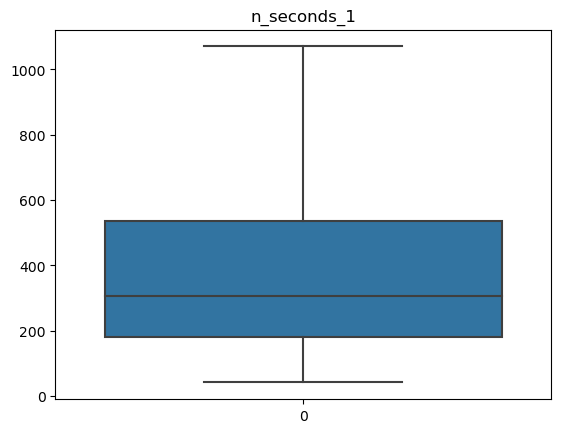

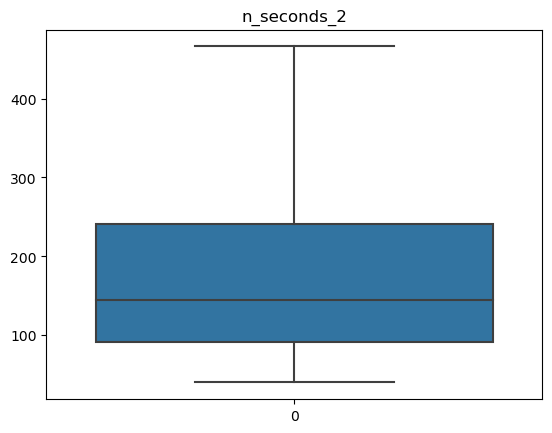

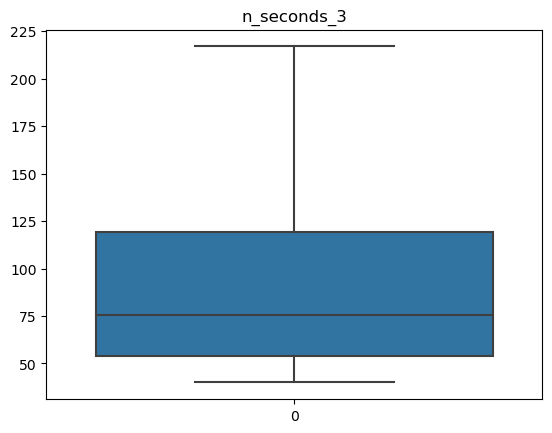

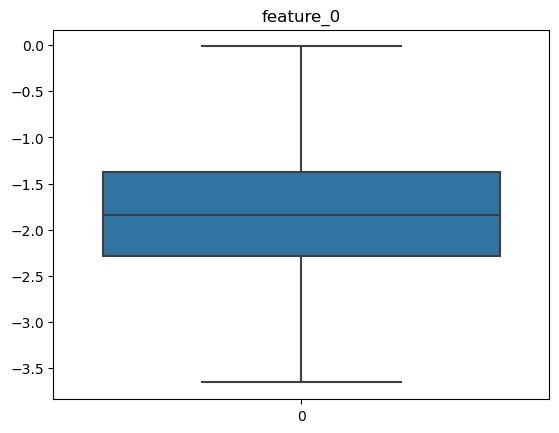

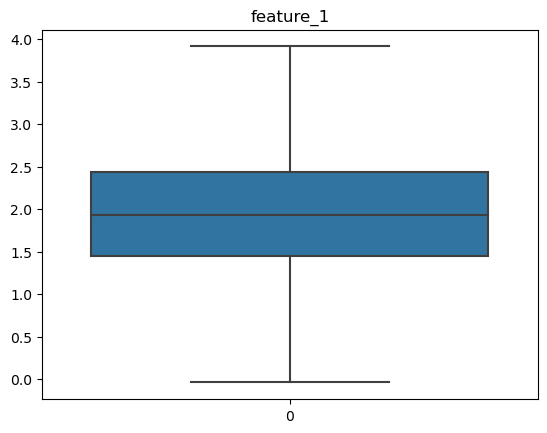

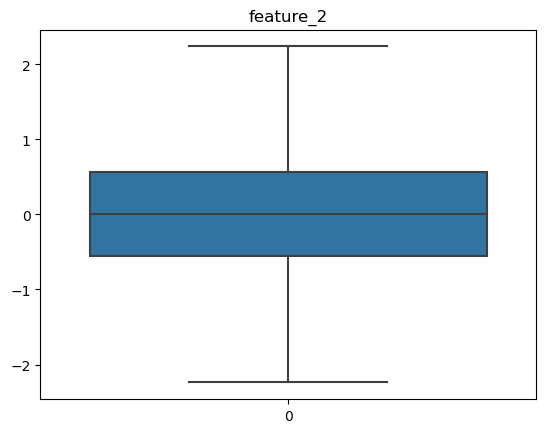

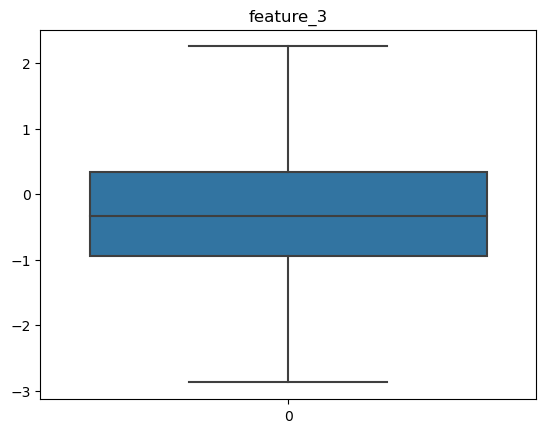

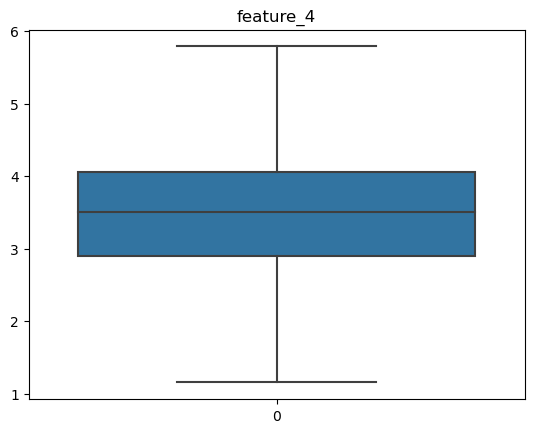

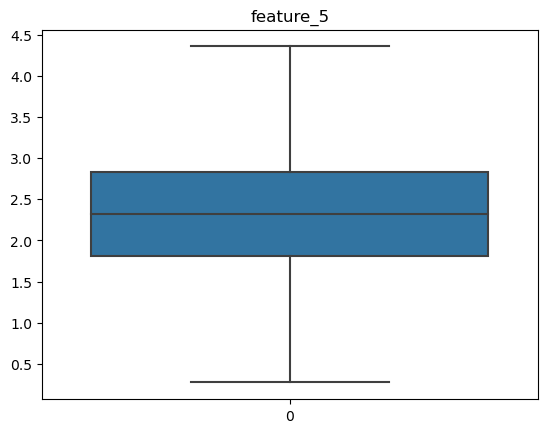

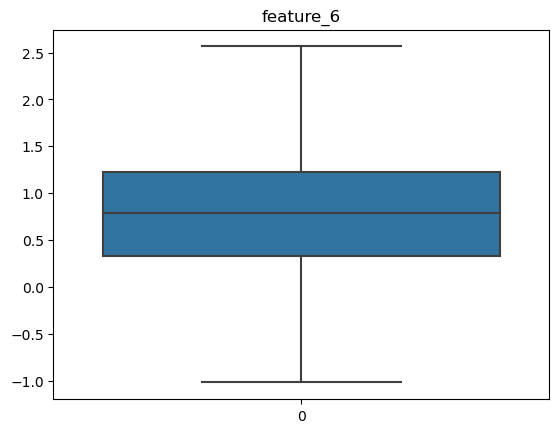

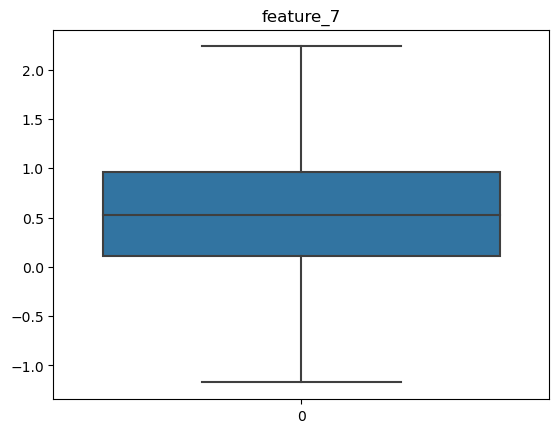

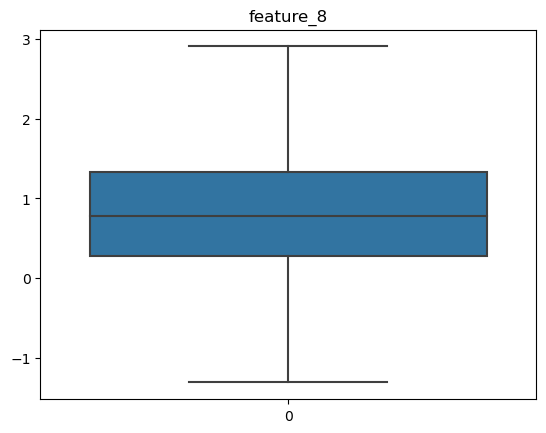

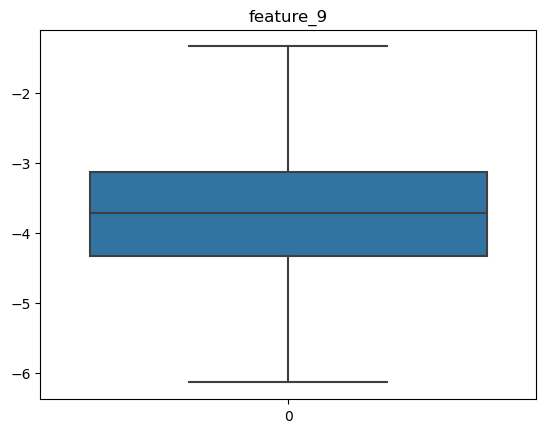

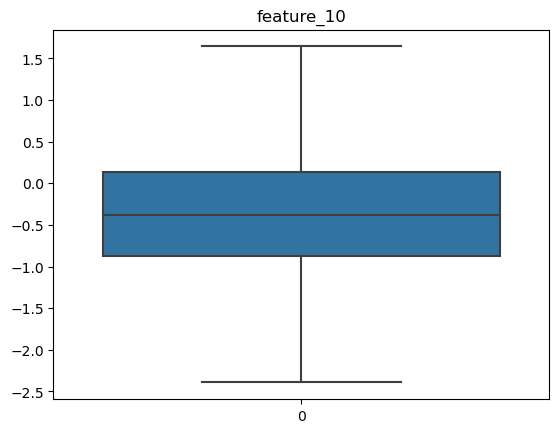

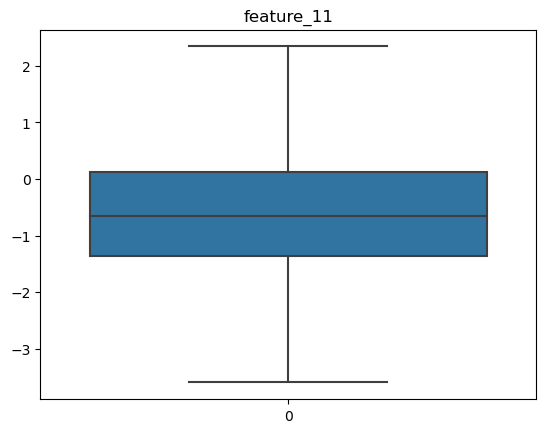

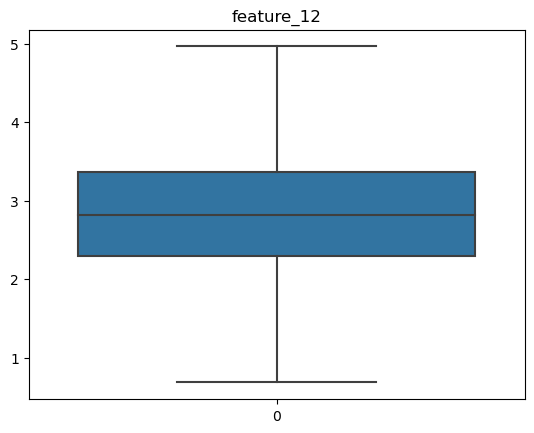

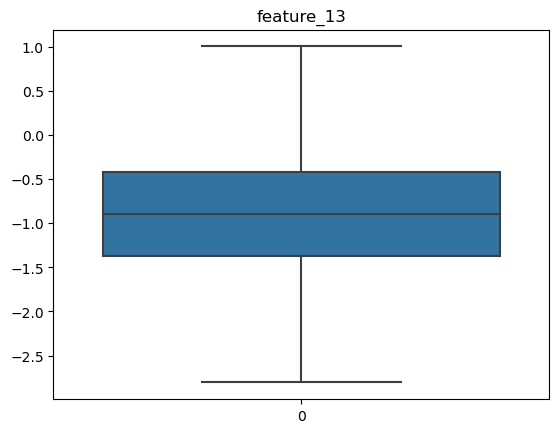

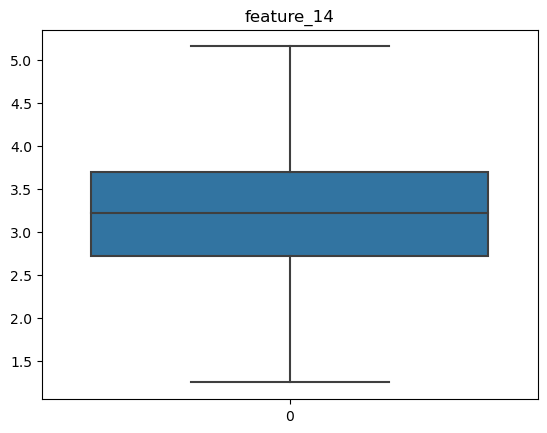

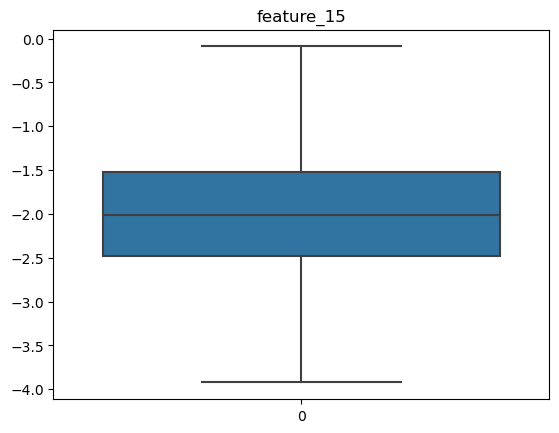

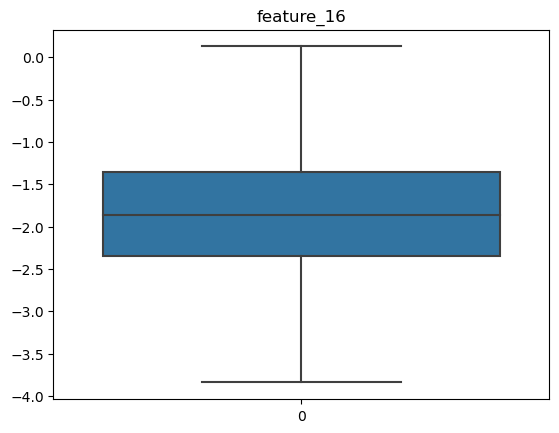

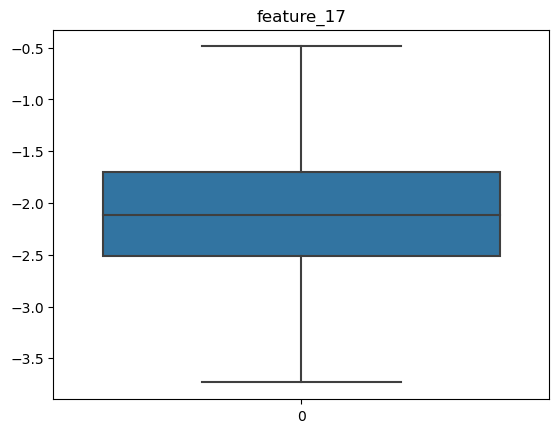

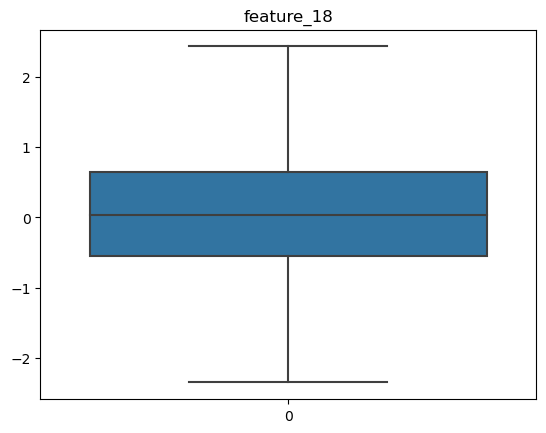

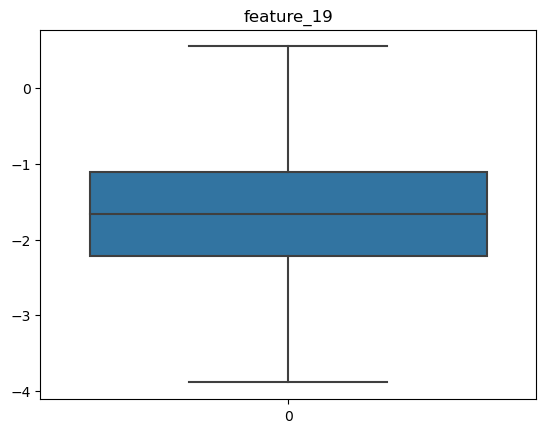

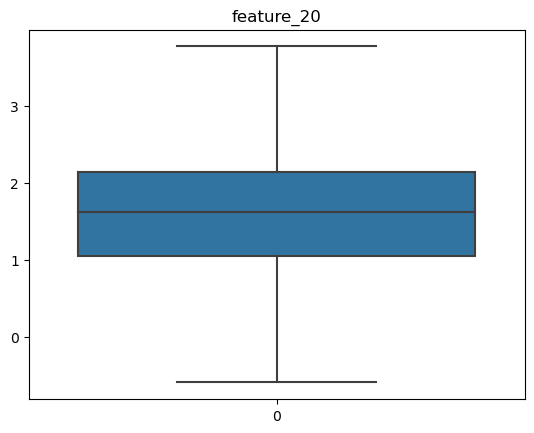

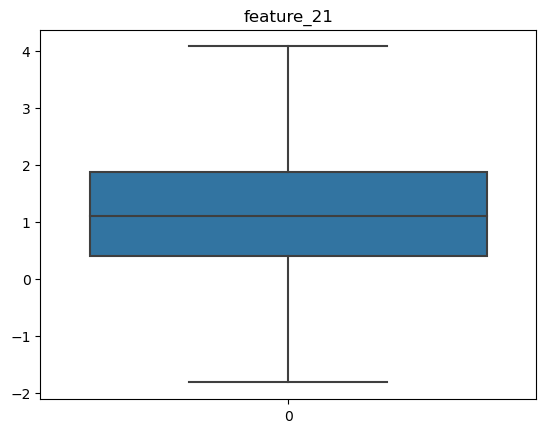

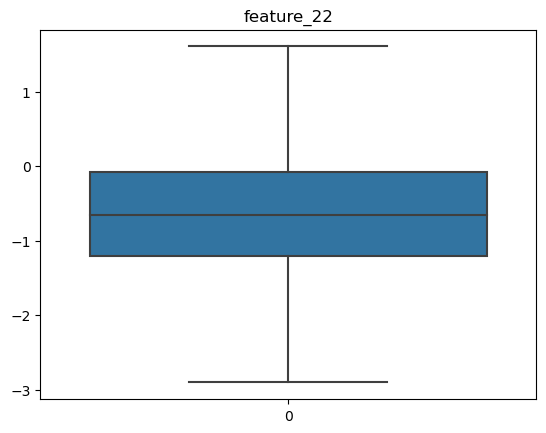

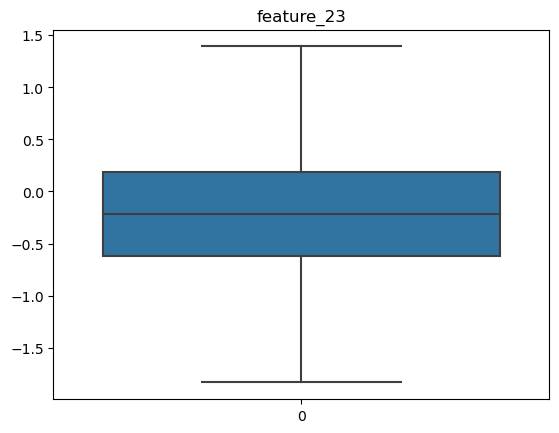

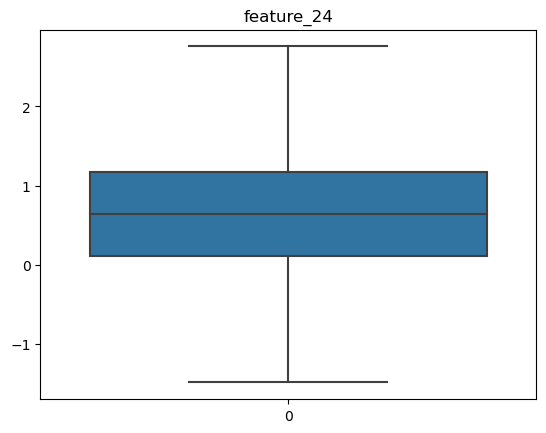

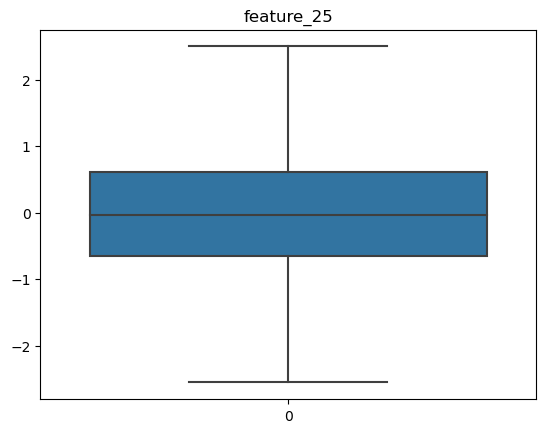

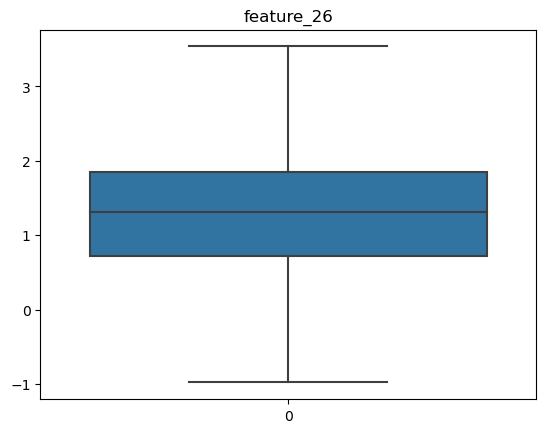

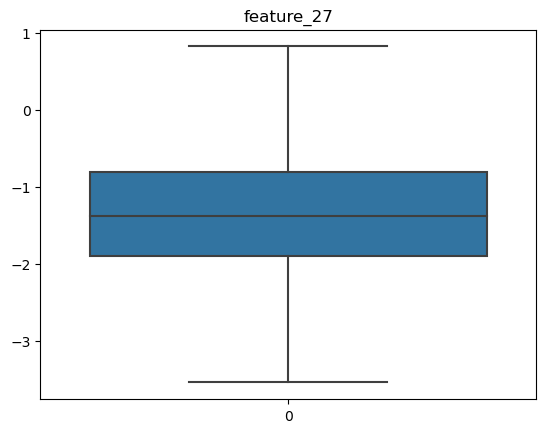

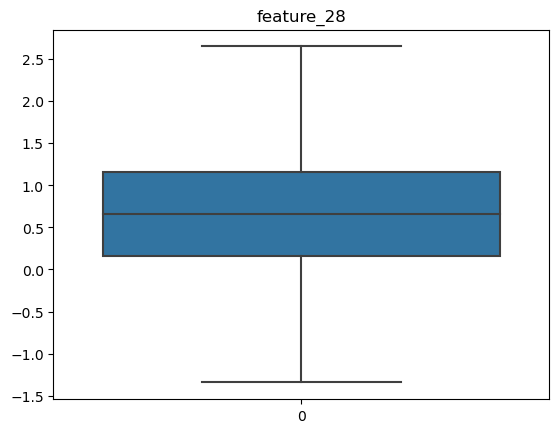

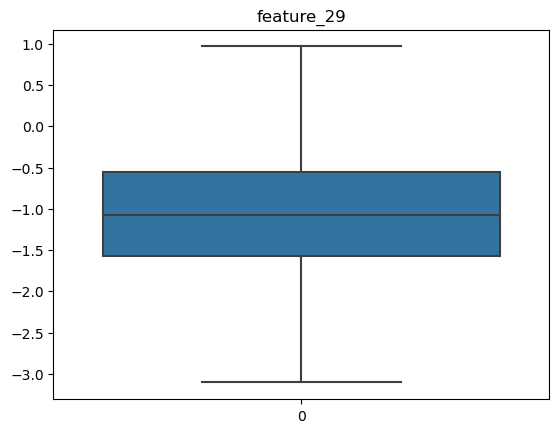

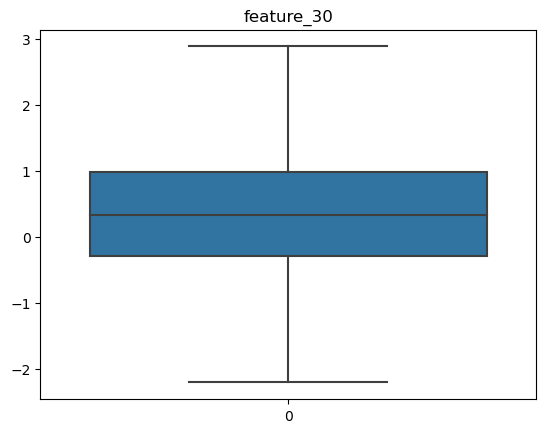

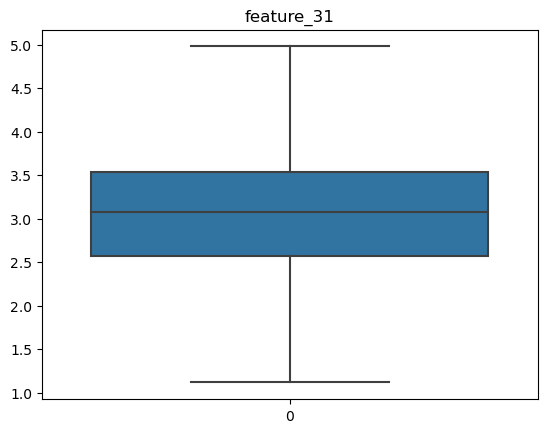

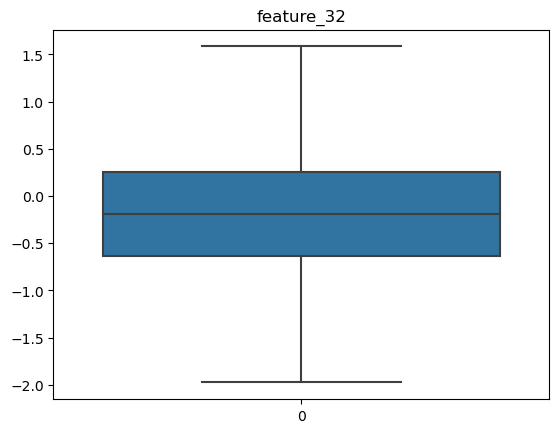

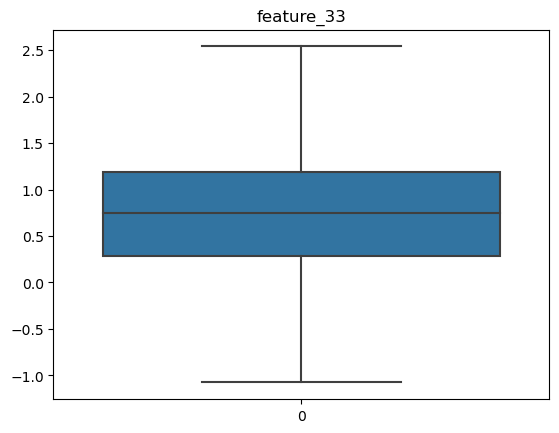

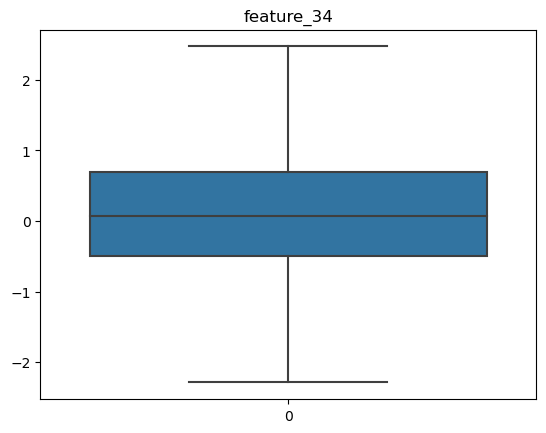

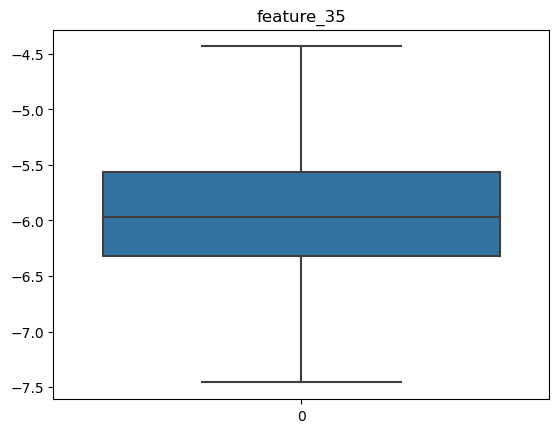

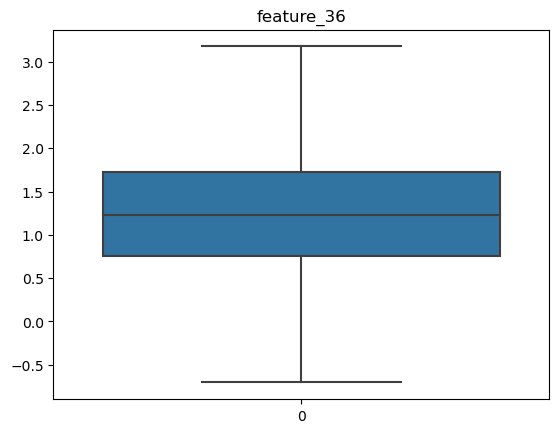

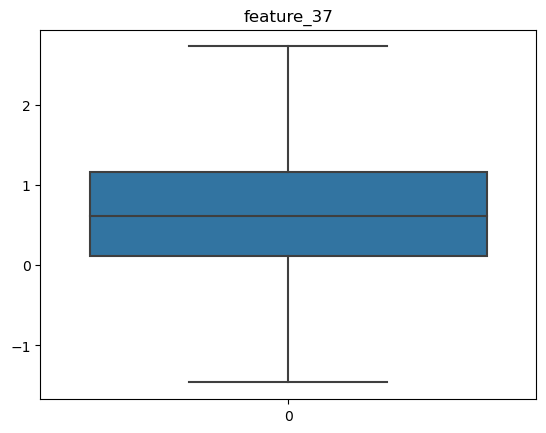

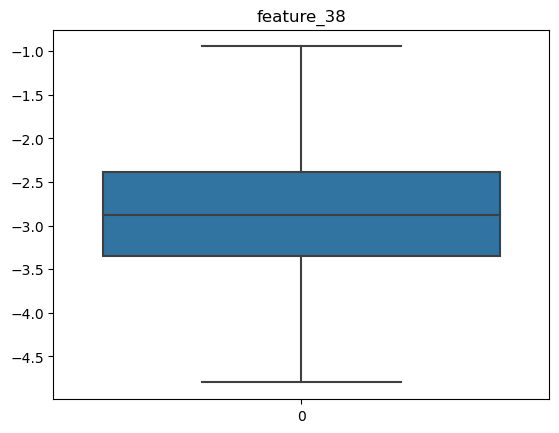

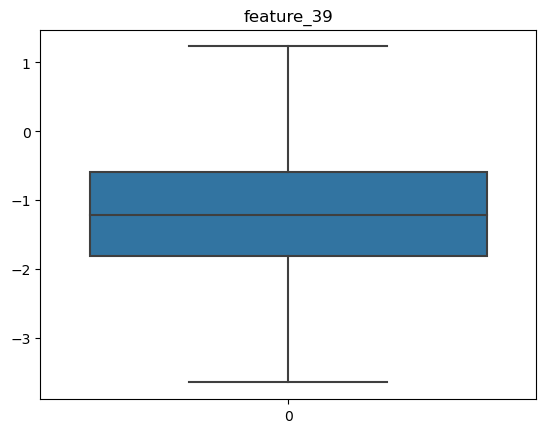

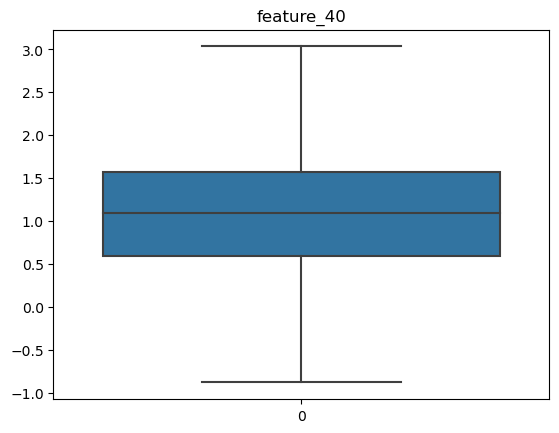

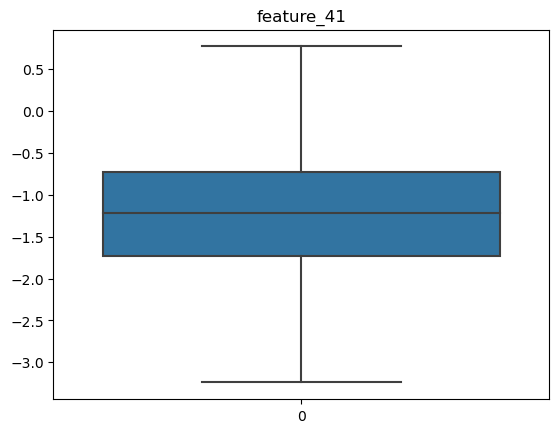

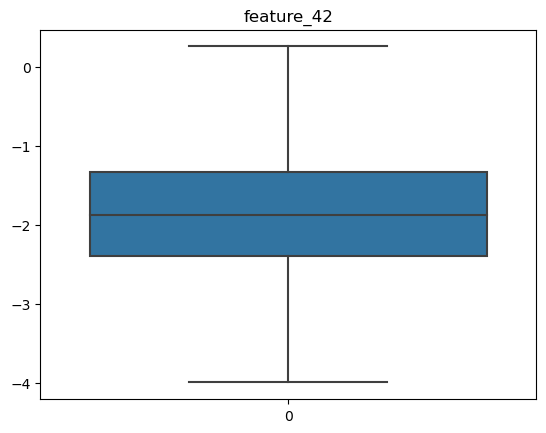

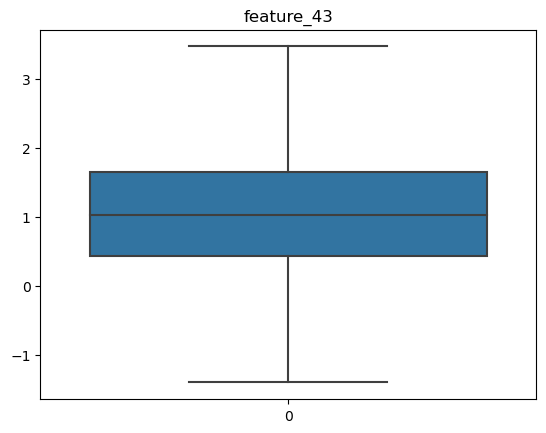

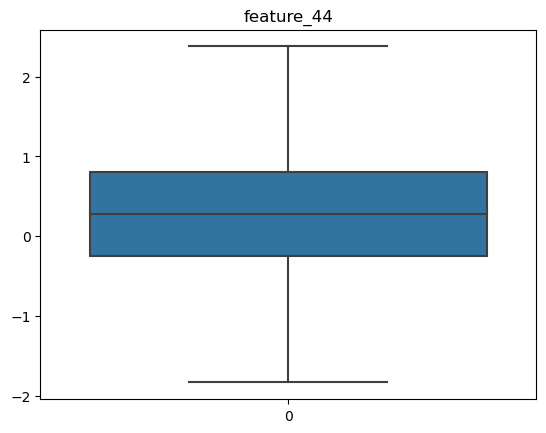

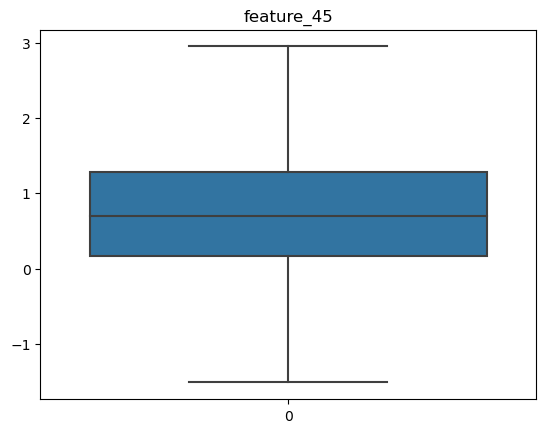

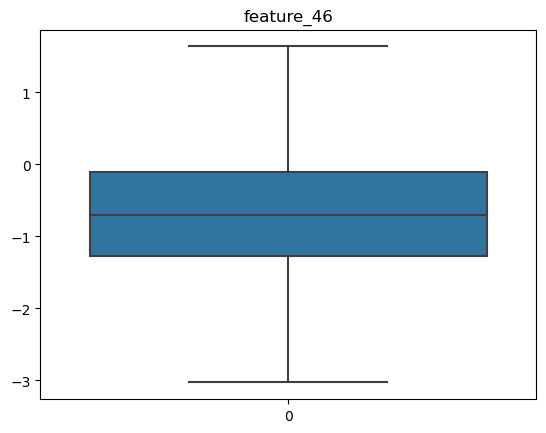

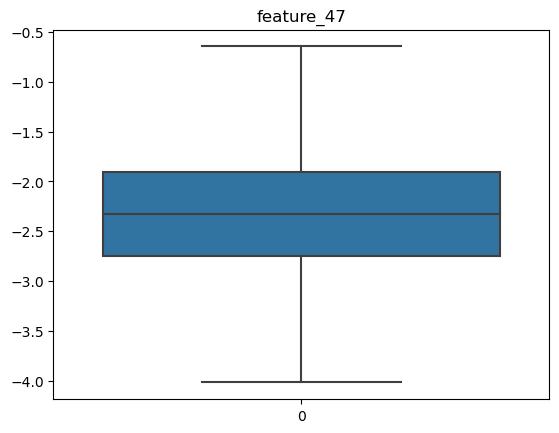

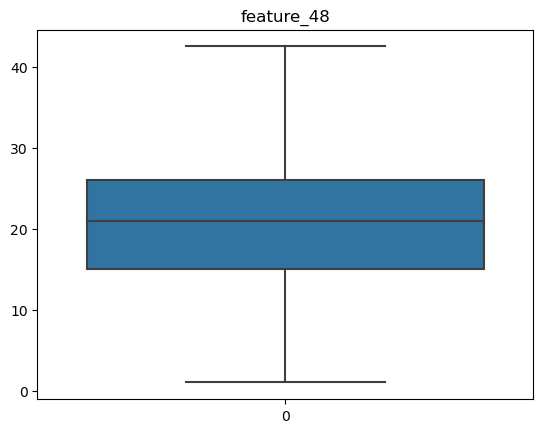

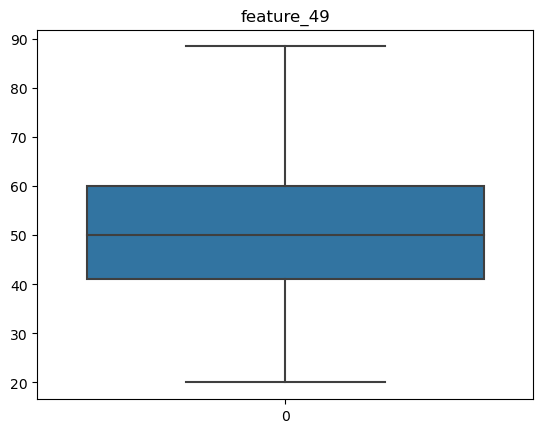

In [12]:
for col in num_cols:
    plt.title(col)
    sns.boxplot(df[col])
    plt.show(block=True)

In [13]:
df.head()

,id,month,n_seconds_1,n_seconds_2,n_seconds_3,carrier,devicebrand,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,feature_11,feature_12,feature_13,feature_14,feature_15,feature_16,feature_17,feature_18,feature_19,feature_20,feature_21,feature_22,feature_23,feature_24,feature_25,feature_26,feature_27,feature_28,feature_29,feature_30,feature_31,feature_32,feature_33,feature_34,feature_35,feature_36,feature_37,feature_38,feature_39,feature_40,feature_41,feature_42,feature_43,feature_44,feature_45,feature_46,feature_47,feature_48,feature_49,target
0,5beefd4d2bf4a4767e0df8108,10,1070.350,465.931,205.948,VODAFONE TR,Apple,-1.198,1.113,-1.123,-0.264,2.161,2.651,0.810,1.516,2.351,-4.608,0.678,-0.555,3.502,-0.765,1.543,-1.458,-1.017,-1.820,0.726,-1.444,1.087,2.102,-0.249,-0.583,-1.330,1.407,1.054,-1.532,1.667,0.251,-0.091,2.676,-0.621,0.163,1.720,-6.139,-0.303,2.725,-3.135,-3.641,0.930,-2.613,-2.033,2.646,-1.023,1.659,-1.559,-2.161,30.000,58.000,"menu2, menu4, menu5"
1,867285b116c063d5a8482f5be,10,1070.350,465.931,216.961,TURKCELL,samsung,-2.336,2.568,-0.495,0.949,3.568,3.358,0.434,0.886,1.452,-3.184,1.024,1.166,2.916,-1.281,3.019,-3.163,-1.120,-2.798,0.287,-2.029,0.260,0.962,-0.534,-1.311,-0.144,-1.562,1.931,-0.942,-0.000,-1.372,1.225,2.795,-0.961,0.114,1.048,-5.697,0.902,-0.073,-2.366,-0.600,0.815,-0.984,-1.454,-0.022,-0.196,2.776,-0.319,-4.019,21.000,45.000,"menu7, menu8, menu4"
2,c82a7cbd2e00d9b66c06bcadc,10,1070.350,465.931,43.806,TURK TELEKOM,Redmi,-2.561,2.062,-0.185,1.062,4.198,1.551,-0.596,-0.619,2.017,-4.631,-0.663,-0.838,1.821,-2.171,3.695,-0.922,-2.873,-2.042,0.533,-0.128,0.450,2.716,-0.178,0.052,-0.518,-0.043,1.157,-0.527,-0.088,-0.497,1.203,2.742,-0.623,1.757,2.059,-5.359,0.929,1.133,-3.100,-1.253,1.057,-1.669,-3.599,1.674,0.632,1.293,-2.231,-2.384,19.000,61.000,"menu2, menu8, menu4"
3,f2d2b25073ccc298eced86897,10,1070.350,154.509,64.724,TURKCELL,samsung,-2.530,3.358,-0.851,1.644,2.849,3.887,1.855,0.988,2.066,-5.804,1.644,0.151,3.145,-2.673,1.248,-2.657,-0.378,-3.276,0.003,-0.674,-0.227,1.817,0.068,-0.787,-1.484,-2.000,1.770,0.049,0.230,-0.304,1.659,1.692,-1.105,1.242,2.043,-4.434,0.649,0.944,-3.027,-1.824,0.204,-1.861,-1.220,1.863,0.213,1.030,-1.142,-4.019,2.000,41.000,"menu6, menu2, menu1"
4,7818c92a58af0f2cb7c361738,10,1070.350,465.931,216.961,VODAFONE TR,samsung,-2.922,2.096,0.061,-1.488,3.225,2.092,-0.993,0.686,2.090,-2.974,-0.797,-1.459,2.398,-1.308,3.381,-2.664,-2.219,-1.714,1.288,-2.250,2.345,0.403,-0.077,0.289,1.847,1.424,1.888,-1.022,1.021,-0.843,-0.859,2.565,0.412,0.068,0.391,-5.996,2.675,0.203,-3.272,-1.418,2.188,-0.143,-1.876,1.024,-0.186,-0.062,-1.462,-2.371,23.000,85.000,"menu6, menu2, menu8"


In [14]:
def categorize_carrier(x):
    if x == "VODAFONE TR":
        return "VODAFONE TR"
    elif x == "TURKCELL":
        return "TURKCELL"
    elif x == "TURK TELEKOM":
        return "TURK TELEKOM"
    else:
        return "others"
    
df["carrier"] = df["carrier"].apply(categorize_carrier)

In [15]:
df.head()

,id,month,n_seconds_1,n_seconds_2,n_seconds_3,carrier,devicebrand,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,feature_11,feature_12,feature_13,feature_14,feature_15,feature_16,feature_17,feature_18,feature_19,feature_20,feature_21,feature_22,feature_23,feature_24,feature_25,feature_26,feature_27,feature_28,feature_29,feature_30,feature_31,feature_32,feature_33,feature_34,feature_35,feature_36,feature_37,feature_38,feature_39,feature_40,feature_41,feature_42,feature_43,feature_44,feature_45,feature_46,feature_47,feature_48,feature_49,target
0,5beefd4d2bf4a4767e0df8108,10,1070.350,465.931,205.948,VODAFONE TR,Apple,-1.198,1.113,-1.123,-0.264,2.161,2.651,0.810,1.516,2.351,-4.608,0.678,-0.555,3.502,-0.765,1.543,-1.458,-1.017,-1.820,0.726,-1.444,1.087,2.102,-0.249,-0.583,-1.330,1.407,1.054,-1.532,1.667,0.251,-0.091,2.676,-0.621,0.163,1.720,-6.139,-0.303,2.725,-3.135,-3.641,0.930,-2.613,-2.033,2.646,-1.023,1.659,-1.559,-2.161,30.000,58.000,"menu2, menu4, menu5"
1,867285b116c063d5a8482f5be,10,1070.350,465.931,216.961,TURKCELL,samsung,-2.336,2.568,-0.495,0.949,3.568,3.358,0.434,0.886,1.452,-3.184,1.024,1.166,2.916,-1.281,3.019,-3.163,-1.120,-2.798,0.287,-2.029,0.260,0.962,-0.534,-1.311,-0.144,-1.562,1.931,-0.942,-0.000,-1.372,1.225,2.795,-0.961,0.114,1.048,-5.697,0.902,-0.073,-2.366,-0.600,0.815,-0.984,-1.454,-0.022,-0.196,2.776,-0.319,-4.019,21.000,45.000,"menu7, menu8, menu4"
2,c82a7cbd2e00d9b66c06bcadc,10,1070.350,465.931,43.806,TURK TELEKOM,Redmi,-2.561,2.062,-0.185,1.062,4.198,1.551,-0.596,-0.619,2.017,-4.631,-0.663,-0.838,1.821,-2.171,3.695,-0.922,-2.873,-2.042,0.533,-0.128,0.450,2.716,-0.178,0.052,-0.518,-0.043,1.157,-0.527,-0.088,-0.497,1.203,2.742,-0.623,1.757,2.059,-5.359,0.929,1.133,-3.100,-1.253,1.057,-1.669,-3.599,1.674,0.632,1.293,-2.231,-2.384,19.000,61.000,"menu2, menu8, menu4"
3,f2d2b25073ccc298eced86897,10,1070.350,154.509,64.724,TURKCELL,samsung,-2.530,3.358,-0.851,1.644,2.849,3.887,1.855,0.988,2.066,-5.804,1.644,0.151,3.145,-2.673,1.248,-2.657,-0.378,-3.276,0.003,-0.674,-0.227,1.817,0.068,-0.787,-1.484,-2.000,1.770,0.049,0.230,-0.304,1.659,1.692,-1.105,1.242,2.043,-4.434,0.649,0.944,-3.027,-1.824,0.204,-1.861,-1.220,1.863,0.213,1.030,-1.142,-4.019,2.000,41.000,"menu6, menu2, menu1"
4,7818c92a58af0f2cb7c361738,10,1070.350,465.931,216.961,VODAFONE TR,samsung,-2.922,2.096,0.061,-1.488,3.225,2.092,-0.993,0.686,2.090,-2.974,-0.797,-1.459,2.398,-1.308,3.381,-2.664,-2.219,-1.714,1.288,-2.250,2.345,0.403,-0.077,0.289,1.847,1.424,1.888,-1.022,1.021,-0.843,-0.859,2.565,0.412,0.068,0.391,-5.996,2.675,0.203,-3.272,-1.418,2.188,-0.143,-1.876,1.024,-0.186,-0.062,-1.462,-2.371,23.000,85.000,"menu6, menu2, menu8"


In [16]:
df.carrier.value_counts()

carrier
TURKCELL        39043
VODAFONE TR     25583
TURK TELEKOM    22091
others           7332
Name: count, dtype: int64

In [17]:
def categorize_device_brand(x):
    if x == "Apple":
        return "Apple"
    elif x == "samsung":
        return "samsung"
    elif x == "xiaomi":
        return "xiaomi"
    elif x == "HUAWEI":
        return "HUAWEI"
    elif x == "OPPO":
        return "OPPO"
    elif x == "Redmi":
        return "Redmi"
    else:
        return "others"
    
df["devicebrand"] = df["devicebrand"].apply(categorize_device_brand)

In [18]:
df["devicebrand"].value_counts()

devicebrand
Apple      33238
samsung    31971
Redmi       7709
HUAWEI      6595
others      5989
xiaomi      5300
OPPO        3247
Name: count, dtype: int64

In [19]:
cat_cols, num_cols, cat_but_car = grab_col_names(df)

Observations: 94049
Variables: 58
cat_cols: 3
num_cols: 53
cat_but_car: 2
num_but_cat: 1


In [20]:
df.head()

,id,month,n_seconds_1,n_seconds_2,n_seconds_3,carrier,devicebrand,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,feature_11,feature_12,feature_13,feature_14,feature_15,feature_16,feature_17,feature_18,feature_19,feature_20,feature_21,feature_22,feature_23,feature_24,feature_25,feature_26,feature_27,feature_28,feature_29,feature_30,feature_31,feature_32,feature_33,feature_34,feature_35,feature_36,feature_37,feature_38,feature_39,feature_40,feature_41,feature_42,feature_43,feature_44,feature_45,feature_46,feature_47,feature_48,feature_49,target
0,5beefd4d2bf4a4767e0df8108,10,1070.350,465.931,205.948,VODAFONE TR,Apple,-1.198,1.113,-1.123,-0.264,2.161,2.651,0.810,1.516,2.351,-4.608,0.678,-0.555,3.502,-0.765,1.543,-1.458,-1.017,-1.820,0.726,-1.444,1.087,2.102,-0.249,-0.583,-1.330,1.407,1.054,-1.532,1.667,0.251,-0.091,2.676,-0.621,0.163,1.720,-6.139,-0.303,2.725,-3.135,-3.641,0.930,-2.613,-2.033,2.646,-1.023,1.659,-1.559,-2.161,30.000,58.000,"menu2, menu4, menu5"
1,867285b116c063d5a8482f5be,10,1070.350,465.931,216.961,TURKCELL,samsung,-2.336,2.568,-0.495,0.949,3.568,3.358,0.434,0.886,1.452,-3.184,1.024,1.166,2.916,-1.281,3.019,-3.163,-1.120,-2.798,0.287,-2.029,0.260,0.962,-0.534,-1.311,-0.144,-1.562,1.931,-0.942,-0.000,-1.372,1.225,2.795,-0.961,0.114,1.048,-5.697,0.902,-0.073,-2.366,-0.600,0.815,-0.984,-1.454,-0.022,-0.196,2.776,-0.319,-4.019,21.000,45.000,"menu7, menu8, menu4"
2,c82a7cbd2e00d9b66c06bcadc,10,1070.350,465.931,43.806,TURK TELEKOM,Redmi,-2.561,2.062,-0.185,1.062,4.198,1.551,-0.596,-0.619,2.017,-4.631,-0.663,-0.838,1.821,-2.171,3.695,-0.922,-2.873,-2.042,0.533,-0.128,0.450,2.716,-0.178,0.052,-0.518,-0.043,1.157,-0.527,-0.088,-0.497,1.203,2.742,-0.623,1.757,2.059,-5.359,0.929,1.133,-3.100,-1.253,1.057,-1.669,-3.599,1.674,0.632,1.293,-2.231,-2.384,19.000,61.000,"menu2, menu8, menu4"
3,f2d2b25073ccc298eced86897,10,1070.350,154.509,64.724,TURKCELL,samsung,-2.530,3.358,-0.851,1.644,2.849,3.887,1.855,0.988,2.066,-5.804,1.644,0.151,3.145,-2.673,1.248,-2.657,-0.378,-3.276,0.003,-0.674,-0.227,1.817,0.068,-0.787,-1.484,-2.000,1.770,0.049,0.230,-0.304,1.659,1.692,-1.105,1.242,2.043,-4.434,0.649,0.944,-3.027,-1.824,0.204,-1.861,-1.220,1.863,0.213,1.030,-1.142,-4.019,2.000,41.000,"menu6, menu2, menu1"
4,7818c92a58af0f2cb7c361738,10,1070.350,465.931,216.961,VODAFONE TR,samsung,-2.922,2.096,0.061,-1.488,3.225,2.092,-0.993,0.686,2.090,-2.974,-0.797,-1.459,2.398,-1.308,3.381,-2.664,-2.219,-1.714,1.288,-2.250,2.345,0.403,-0.077,0.289,1.847,1.424,1.888,-1.022,1.021,-0.843,-0.859,2.565,0.412,0.068,0.391,-5.996,2.675,0.203,-3.272,-1.418,2.188,-0.143,-1.876,1.024,-0.186,-0.062,-1.462,-2.371,23.000,85.000,"menu6, menu2, menu8"
